In this notebook, I will demostrate **K Mean Algorithim** . To Prepare this notebook I have taken reference from `Krish Naik Youtube Chanel`

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing dataset.

In [2]:
from sklearn.datasets import make_blobs

In [3]:
x,y = make_blobs(n_samples=1500,centers=3,random_state=23)

In [4]:
x.shape

(1500, 2)

## Visualizing Data

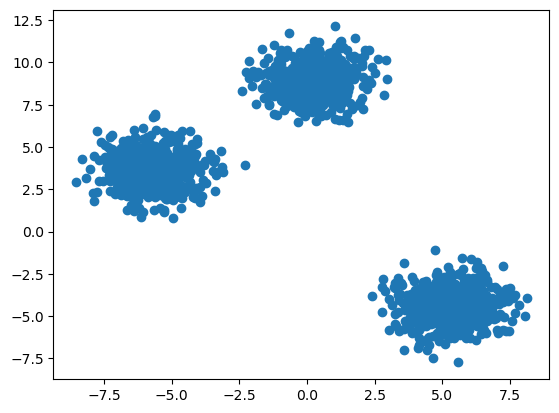

In [5]:
plt.scatter(x[:,0],x[:,1])

## Splitting data

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1200, 2), (1200,), (300, 2), (300,))

## Training Data

In [8]:
from sklearn.cluster import KMeans
wcss = [] #within cluster squared sum
for k in range(1,11):
    km = KMeans(n_clusters=k,random_state=0)
    km.fit(x_train)
    wcss.append(km.inertia_)
wcss
    

C:\Users\SANDIP\Documents\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\SANDIP\Documents\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\SANDIP\Documents\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\SANDIP\Documents\sample_project_1\env\lib\site-packages\sklea

[62483.523145025494,
 14796.341115141136,
 2422.213163580174,
 2124.449395211496,
 1863.4528236326807,
 1586.8933055444227,
 1407.3827515158735,
 1236.2464987914236,
 1082.8355411531527,
 998.7351177913183]

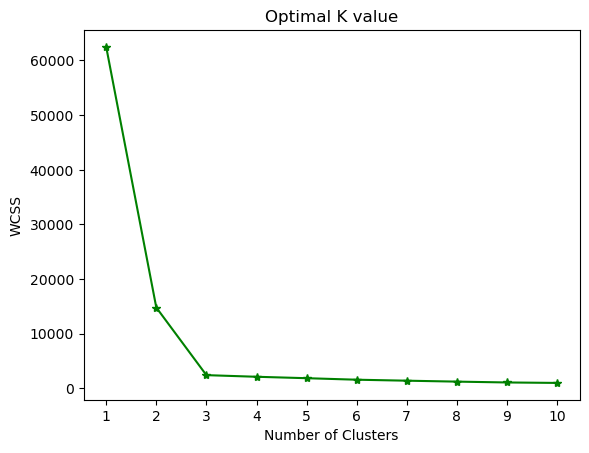

In [9]:
## Visualization of wcss
plt.plot(range(1,11),wcss,color="green",marker="*")
plt.title("Optimal K value")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.xticks(range(1,11))
plt.show()

## Finding **K** using `kneed` library.

In [16]:
from kneed import KneeLocator

In [24]:
KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing").knee

3

## Performance matrix

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
silhouette_coefficient = []
for k in range(2,11):
    km = KMeans(n_clusters=k,init="k-means++")
    km.fit(x_train)
    score = silhouette_score(x_train,km.labels_)
    silhouette_coefficient.append(score)

C:\Users\SANDIP\Documents\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\SANDIP\Documents\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\SANDIP\Documents\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\SANDIP\Documents\sample_project_1\env\lib\site-packages\sklea

In [27]:
silhouette_coefficient

[0.7232524403426582,
 0.8056927691875629,
 0.6501372417266285,
 0.46300120117835414,
 0.3233108289516156,
 0.32927112418770793,
 0.3326513115396631,
 0.34069942150738863,
 0.338618893999402]

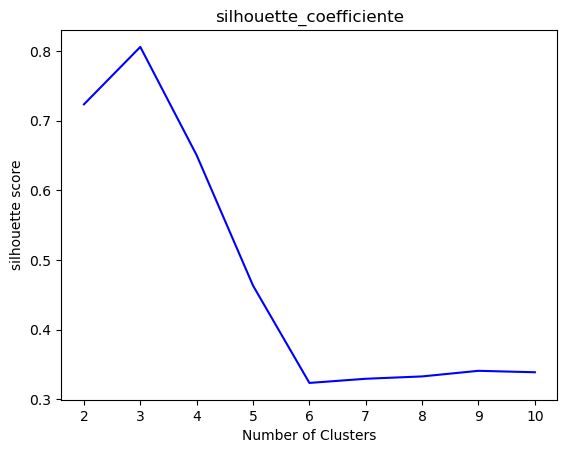

In [30]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficient,color="blue")
plt.title("silhouette_coefficiente")
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette score")
plt.show()